In [27]:
#Import required Liabraries
import pandas as pd

In [28]:
#Load the dataset
df = pd.read_csv("C:/Users/bhadr/Desktop/SONALI/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [29]:
#Top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
#Clean Column names
df.columns =  df.columns.str.lower().str.replace(' ','_')

In [31]:
#Shape of Dataset
df.shape

(7043, 21)

In [32]:
#Column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [33]:
#Check missing values
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [34]:
# Convert TotalCharges to numeric (coerce errors turns bad data into NaN).
df['totalcharges'] =  pd.to_numeric(df['totalcharges'], errors='coerce')

In [35]:
#Check nulls
df['totalcharges'].isnull().sum()

11

In [36]:
#Drop rows with missing total charges
df= df.dropna(subset=['totalcharges'])

#Check nulls again
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [37]:
df.reset_index(drop=True, inplace=True)

In [38]:
#Import required Liabraries
import seaborn as sns
import matplotlib.pyplot as plt

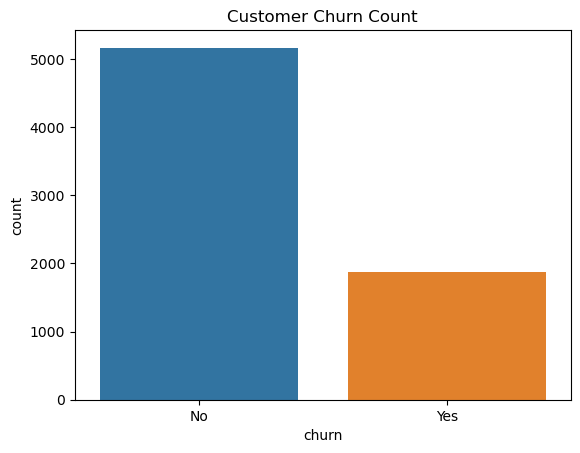

In [39]:
#Count of Churn vs Not Churned
sns.countplot(data=df, x='churn')
plt.title("Customer Churn Count")
plt.show()

In [40]:
#Exact % of churned
churn_rate = df['churn'].value_counts(normalize=True)*100
print(churn_rate)

churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


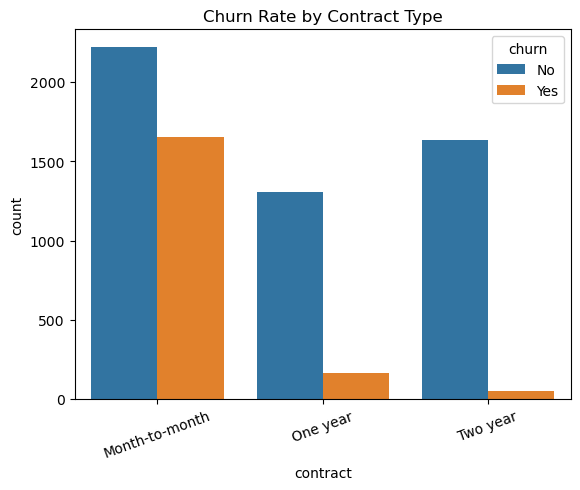

In [41]:
# Churn by Contract Type
sns.countplot(data=df, x='contract', hue='churn')
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=20)
plt.show()

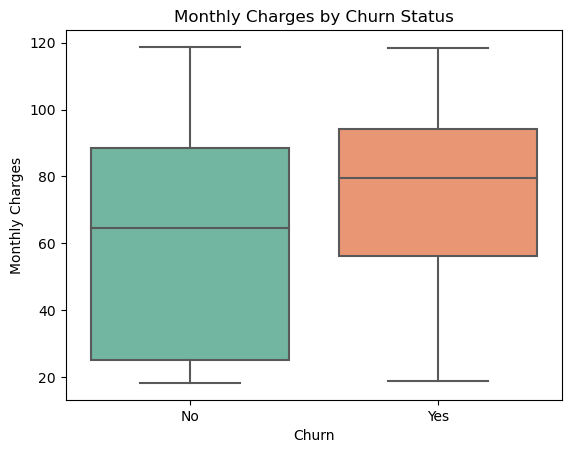

In [42]:
#Monthly Charges vs Churn
sns.boxplot(data=df, x='churn', y='monthlycharges', palette='Set2')
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

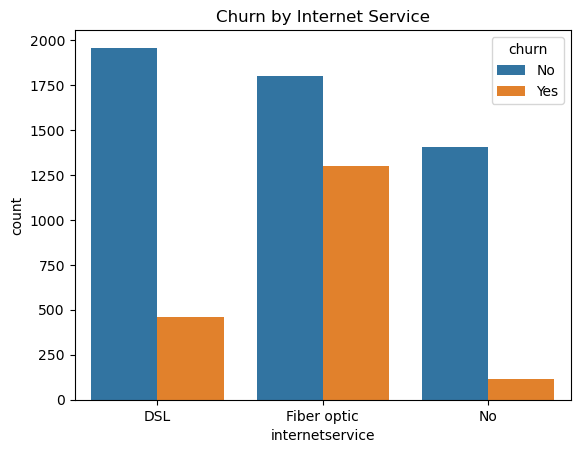

In [43]:
#Internet Service vs Churn
sns.countplot(data=df, x='internetservice', hue='churn')
plt.title("Churn by Internet Service")
plt.show()

# Correlation Heatmap

In [44]:
#Convert yes/no column to 1/0
df_encoded = df.copy()
df_encoded['churn'] = df_encoded['churn'].map({'Yes': 1, 'No': 0})

#Only select numeric columns
num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

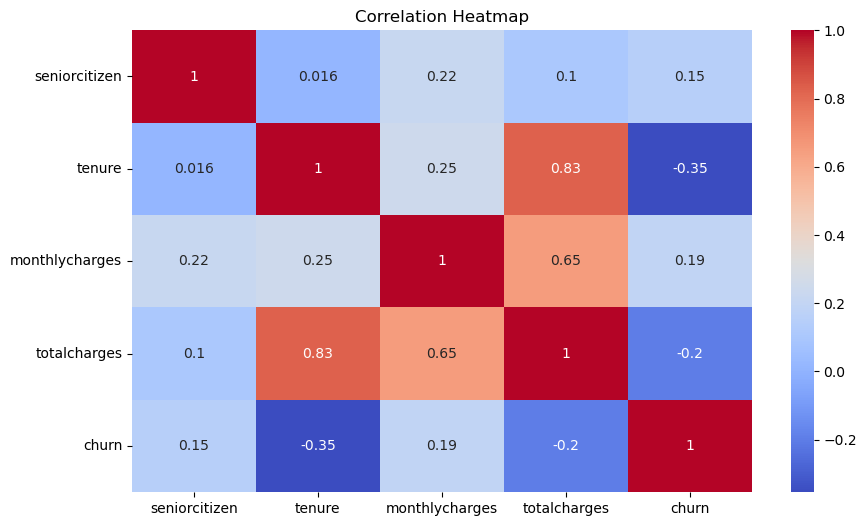

In [45]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [46]:
#Drop irrelevant columns
df.drop(['customerid'], axis=1, inplace=True)

In [47]:
#Convert categorical to numerical
df_encoded =  pd.get_dummies(df, drop_first=True)

In [48]:
#Check for null values
df_encoded.isnull().sum()

seniorcitizen                            0
tenure                                   0
monthlycharges                           0
totalcharges                             0
gender_Male                              0
partner_Yes                              0
dependents_Yes                           0
phoneservice_Yes                         0
multiplelines_No phone service           0
multiplelines_Yes                        0
internetservice_Fiber optic              0
internetservice_No                       0
onlinesecurity_No internet service       0
onlinesecurity_Yes                       0
onlinebackup_No internet service         0
onlinebackup_Yes                         0
deviceprotection_No internet service     0
deviceprotection_Yes                     0
techsupport_No internet service          0
techsupport_Yes                          0
streamingtv_No internet service          0
streamingtv_Yes                          0
streamingmovies_No internet service      0
streamingmo

In [49]:
#Train the Model

from sklearn.model_selection import train_test_split

X= df_encoded.drop('churn_Yes', axis=1)
y= df_encoded['churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#Model Building (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
         
y_pred = model.predict(X_test)

In [51]:
#Evaluation

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7874911158493249
Confusion Matrix:
 [[917 116]
 [183 191]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [53]:
df.to_csv("Telco_Churn_Cleaned.csv", index=False)